# Test Shapenet Dataset

In [20]:
from im2mesh import config, data
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

## Test loading of dataset

In [2]:
data_folder = '../../data/stereo_training_data'
train_dataset = data.Shapes3dMonoDataset(data_folder, 'train', ['mug', 'bowl', 'bottle'])
test_dataset = data.Shapes3dMonoDataset(data_folder, 'test', ['mug', 'bowl', 'bottle'])

## Test \_\_getitem\_\_

In [15]:
def plot_image_lists(l_images, r_images):
    """
    Plot list of images side by side.

    Args:
        l_images (list): List of left images
        r_images (list): List of right images
    """
    im_dim = 2
    fig, axs = plt.subplots(len(l_images), 2, figsize=(2 * im_dim, len(l_images) * im_dim))
    for i in range(len(l_images)):
        axs[i, 0].imshow(l_images[i])
        axs[i, 1].imshow(r_images[i])
    plt.show()

def multiplot(point_list: 'list[np.ndarray]', fname='debug.html'):
    """
    Plot each group of points in {point_list} in a different color on the same
    graph and saves to {fname}.
    Args:
        point_list (list[np.ndarray]): List of pointclouds in the form
            of (n_i x 3)
        fname (str, optional): Name of file to save result to.
            Defaults to 'debug.html'.
    Returns:
        plotly plot: Plot that is produced.
    """

    plot_pts = np.vstack(point_list)

    color = np.ones(plot_pts.shape[0])

    idx = 0
    for i, pts in enumerate(point_list):
        next_idx = idx + pts.shape[0]
        color[idx:next_idx] *= (i + 1)
        idx = next_idx


    fig = px.scatter_3d()

    fig.add_trace(go.Scatter3d(
        x=plot_pts[:, 0], y=plot_pts[:, 1], z=plot_pts[:, 2],
        mode='markers',
        marker=dict(color=color, size=2)
    ))

    fig.update_layout(scene_aspectmode='data')
    # fig.update_traces(marker=dict(size=4))
    # fig.update_traces(marker=dict(size=5),
    #               selector=dict(mode='markers'))

    # fig.write_html(fname)
    # iplot(fig)

    return fig

In [11]:
data_pt = test_dataset.__getitem__(0)

614
76
5c48d471200d2bf16e8a121e6886e18d


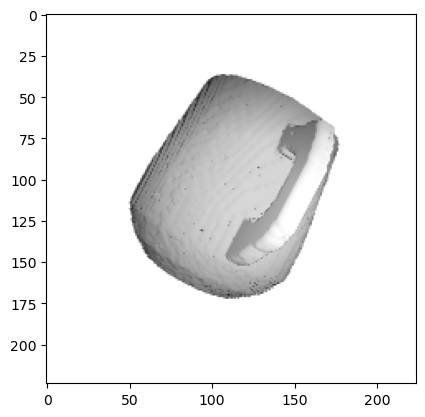

In [25]:
print(len(train_dataset.models))
print(len(test_dataset.models))
print(train_dataset.models[0])

fig, axs = plt.subplots()
axs.imshow(data_pt['inputs'])
in_points = data_pt['points'][data_pt['points.occ'][:, 0], :]
out_points = data_pt['points'][~ data_pt['points.occ'][:, 0], :]
multiplot([in_points, out_points])
multiplot([in_points])

